# House Prices - Tek5
Notebook de base pour le projet Kaggle House Prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Informations générales

In [2]:
data = pd.read_csv('data/train.csv')


In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
target = 'SalePrice'

X = data.drop(columns=[target])
y = data[target]

In [6]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [7]:
data.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

In [8]:
none_cols = [
    'PoolQC', 'Alley', 'Fence', 'MiscFeature',
    'FireplaceQu', 'GarageType', 'GarageQual', 'GarageFinish'
]

data[none_cols] = data[none_cols].fillna('None')

data['LotFrontage'] = data['LotFrontage'].fillna(
    data['LotFrontage'].median()
)

In [9]:
data.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      872
GarageCond       81
GarageYrBlt      81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrArea        8
Electrical        1
dtype: int64

In [10]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['Electrical'] = data['Electrical'].fillna(
    data['Electrical'].mode()[0]
)

In [11]:
data.isnull().sum().sort_values(ascending=False).head(10)


GarageYrBlt     81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MSSubClass       0
LandContour      0
Utilities        0
dtype: int64

In [12]:
# Garage : absence
garage_none_cols = [
    'GarageCond'
]

data[garage_none_cols] = data[garage_none_cols].fillna('None')

# Année du garage : 0 si pas de garage
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

# Sous-sol : absence
bsmt_none_cols = [
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'BsmtQual', 'BsmtCond'
]

data[bsmt_none_cols] = data[bsmt_none_cols].fillna('None')


In [13]:
data.isnull().sum().sum()

np.int64(0)

In [14]:
target = 'SalePrice'

X = data.drop(columns=[target])
y = data[target]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Séparer train / validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Colonnes
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# Modèle
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Pipeline final
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
from sklearn.metrics import mean_absolute_error

preds = pipe.predict(X_val)
mae = mean_absolute_error(y_val, preds)
mae

17692.70102739726

In [17]:
import pandas as pd

comparison = pd.DataFrame({
    "Prix réel": y_val,
    "Prix prédit": preds,
    "Erreur": y_val - preds
})

comparison.head(10)

,Prix réel,Prix prédit,Erreur
892,154500,140008.50,14491.50
1105,325000,330791.99,-5791.99
413,115000,116497.25,-1497.25
522,159000,150445.00,8555.00
1036,315500,322131.02,-6631.02
614,75500,84633.00,-9133.00
218,311500,208633.23,102866.77
1160,146000,150091.00,-4091.00
649,84500,84097.66,402.34
887,135500,131945.71,3554.29


In [18]:
## Part 2.3 — Clustering
##In this part, we apply an unsupervised learning method (clustering) on the House Prices dataset.
##The goal is to identify different house profiles based on their physical characteristics,
##without using the target variable SalePrice.
    
    ### Feature selection for clustering

##For clustering, only numerical features describing the physical characteristics of houses
##are selected. The sale price is intentionally excluded to keep the task unsupervised.


In [19]:
# Features selected for clustering
cluster_features = [
    'GrLivArea',
    'TotalBsmtSF',
    'GarageArea',
    'YearBuilt',
    'OverallQual'
]

X_cluster = data[cluster_features].fillna(0)
X_cluster.head()

,GrLivArea,TotalBsmtSF,GarageArea,YearBuilt,OverallQual
0,1710,856,548,2003,7
1,1262,1262,460,1976,6
2,1786,920,608,2001,7
3,1717,756,642,1915,7
4,2198,1145,836,2000,8


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters


In [22]:
data.groupby('Cluster')[cluster_features].mean()

,GrLivArea,TotalBsmtSF,GarageArea,YearBuilt,OverallQual
Cluster,,,,,
0,1234.819936,825.336013,321.594855,1945.768489,5.049839
1,2161.522267,1618.408907,744.761134,1995.975709,8.048583
2,1540.817259,1067.243655,518.719120,1987.778342,6.389171


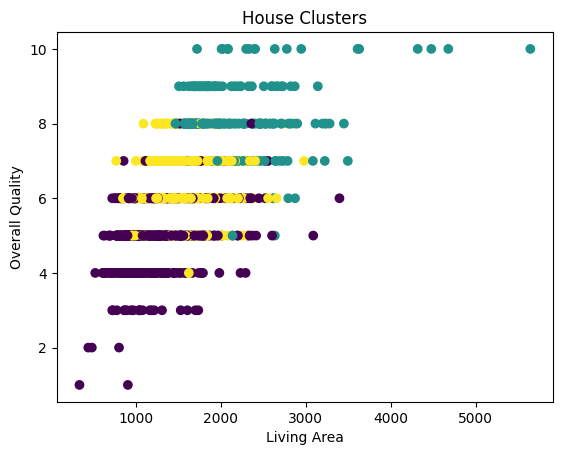

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    data['GrLivArea'],
    data['OverallQual'],
    c=data['Cluster']
)
plt.xlabel('Living Area')
plt.ylabel('Overall Quality')
plt.title('House Clusters')
plt.show()
